### Importing important libraries and dataset

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [20]:
dataset = fetch_openml('mnist_784')
X = dataset['data']
y = dataset['target']

### Preprocessing and Preparing Data

In [21]:
X = np.array(X)

y = np.array(y.astype(int))

X = X/255 #So that every pixel value is between 0(black) and 1(white)

In [22]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.9)
train_X = train_X.T
test_X = test_X.T
train_y = train_y.astype(int)
test_y = test_y.astype(int)

In [23]:
train_y.dtype

dtype('int64')

In [24]:
# One Hot Encoding y
def one_hot_encode(arr):
    one_hot = np.zeros((arr.size, int(arr.max())+1))
    ind = 0
    for i in arr:
        one_hot[ind, int(i)] = 1
        ind += 1
        
    
    return one_hot.T

### Visualizing the Data

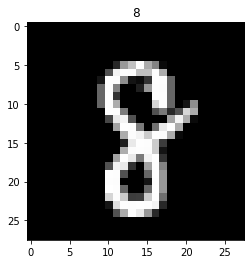

In [25]:
# Displaying an example image from dataset

index = 3976 #index of image
img = np.array(X)
plt.title(y.T[index])
plt.imshow(img[index].reshape(28,28), cmap = 'gray')
plt.show()

### Defining important functions

In [26]:
def activation(z):
    
    return np.maximum(z, 0) #ReLU
    
    '''
    a = 1/(1+np.exp(-z)) #Sigmoid
    return a
    '''

In [27]:
def d_activation(z): #Derivative of activation function
    
    return z>0
    
    #return z*(1-z)

In [28]:
def softmax(z):
    
    a = np.exp(z) / sum(np.exp(z))
    
    #a = (np.exp(z))/np.sum(np.exp(z), axis = 0)
    return a

### Initialization & Training

In [29]:
def initialize(n_x, n_h, n_y): # NN with one hidden layer
    #w1 = np.random.randn(n_h, n_x)*0.01
    #b1 = np.zeros((n_h, 1))
    #w2 = np.random.rand(n_y, n_h)*0.01
    #b2 = np.zeros((n_y, 1))
    
    w1 = (np.random.rand(n_h, n_x) - 0.5)
    b1 = (np.random.rand(n_h, 1)) - 0.5
    w2 = (np.random.rand(n_y, n_h) - 0.5)
    b2 = (np.random.rand(n_y, 1)) - 0.5
    
    return w1, b1, w2, b2

In [30]:
def forward(w1, b1, w2, b2, X):

    z1 = np.dot(w1, X) + b1
    a1 = activation(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    
    return z1, a1, z2, a2

In [31]:
def backward(z1, a1, z2, a2, w2, X, y):
    one_hot_y = one_hot_encode(y)
    m = y.size
    
    dz2 = a2 - one_hot_y
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2)
    
    dz1 = np.multiply(np.dot(w2.T, dz2), d_activation(z1))
    dw1 = (1/m)*np.dot(dz1, X.T)
    db1 = (1/m)*np.sum(dz1)
    
    
    return dw1, db1, dw2, db2    

In [32]:
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate):
    
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
       
    return w1, b1, w2, b2

In [33]:
def cost(a2, y):
    return np.mean(np.power(a2 - y, 2))

def acc(a2, y):
    pred = np.argmax(a2, 0)
    counter = 0
    for j in range(y.size):
        if pred[j] == y[j]:
            counter += 1
            
    return counter/y.size    

def gradient_descent(X, y, iterations, learning_rate):
    w1, b1, w2, b2 = initialize(784, 128, 10)
    error = []
    accuracy = []
    for i in range(iterations):
        z1, a1, z2, a2 = forward(w1, b1, w2, b2, X) # Forward prop
        
        dw1, db1, dw2, db2 = backward(z1, a1, z2, a2, w2, X, y) # Back prop
        
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate)
        # Parameter update
        
        cos = cost(np.argmax(a2,0), y)
        accur = acc(a2,y)
        accuracy.append(accur)
        error.append(cos)
        
        if i%100 == 0:
            
            print("MSE at iteration ", i, " = ", cos)
            print("Accuracy at iteration ", i, " = ", accur)
            print()
            
    return w1, b1, w2, b2, error, accuracy

In [34]:
w1, b1, w2, b2, error, accuracy = gradient_descent(train_X, train_y, 1005, 0.1)

MSE at iteration  0  =  15.059825396825397
Accuracy at iteration  0  =  0.08323809523809524

MSE at iteration  100  =  2.957888888888889
Accuracy at iteration  100  =  0.8206666666666667

MSE at iteration  200  =  2.2493333333333334
Accuracy at iteration  200  =  0.8651746031746032

MSE at iteration  300  =  1.9208730158730158
Accuracy at iteration  300  =  0.8854126984126984

MSE at iteration  400  =  1.7370158730158731
Accuracy at iteration  400  =  0.8976349206349207

MSE at iteration  500  =  1.5885555555555555
Accuracy at iteration  500  =  0.9066507936507936

MSE at iteration  600  =  1.4844920634920635
Accuracy at iteration  600  =  0.912952380952381

MSE at iteration  700  =  1.4044761904761904
Accuracy at iteration  700  =  0.9182063492063492

MSE at iteration  800  =  1.3447142857142858
Accuracy at iteration  800  =  0.9223492063492064

MSE at iteration  900  =  1.2875555555555556
Accuracy at iteration  900  =  0.9259047619047619

MSE at iteration  1000  =  1.2406190476190475

### Plotting graphs

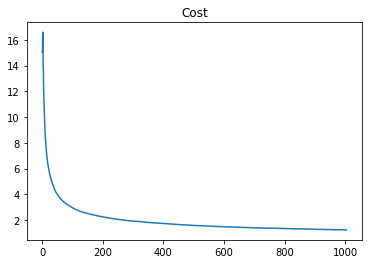

In [35]:
plt.title("Cost")
plt.plot(error) # How cost decreased

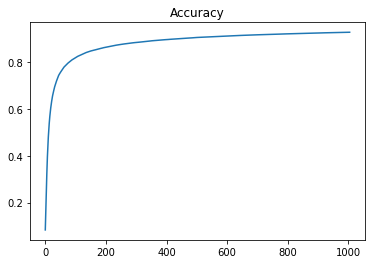

In [36]:
plt.title("Accuracy")
plt.plot(accuracy) # How accuracy increased

### Checking accuracy on Test set

In [37]:
def test_set(X, y, w1, b1, w2, b2):
    z1, a1, z2, a2 = forward(w1, b1, w2, b2, X)
    print("Accuracy = ", acc(a2, y))

In [38]:
test_set(test_X, test_y, w1, b1, w2, b2)

Accuracy =  0.916


In [39]:
# See prediction alongside images
def make_prediction(X, w1, b1, w2, b2):
    _, _, _, a2 = forward(w1, b1, w2, b2, X)
    return np.argmax(a2)

def test_prediction(index, w1, b1, w2, b2):
    current_image = test_X[:, index, None]
    prediction = make_prediction(test_X[:, index, None], w1, b1, w2, b2)
    label = test_y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()

Prediction:  7
Label:  7


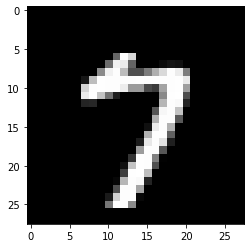


Prediction:  0
Label:  0


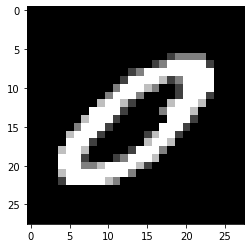


Prediction:  7
Label:  7


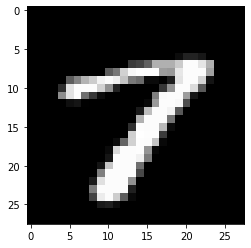


Prediction:  8
Label:  8


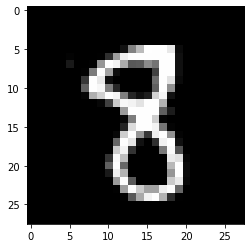


Prediction:  0
Label:  0


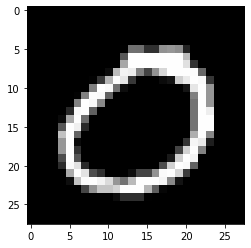

In [40]:
for i in range(50, 55):
    test_prediction(i, w1, b1, w2, b2)
    print()

### Trying code on custom image

In [41]:
from PIL import Image

In [42]:
def load_image():
    img = Image.open("../input/my-image/image.jpg").convert("L")
    img = np.resize(img, (28,28,1))
    img2arr = np.array(img)
    img2arr = img2arr.reshape(784, 1)
    return img2arr

In [43]:
im = load_image()

In [44]:
im.shape

(784, 1)

In [45]:
def custom(im, w1, b1, w2, b2):
    current_image = im
    prediction = make_prediction(im, w1, b1, w2, b2)
    #label = test_y[index]
    print("Prediction: ", prediction)
    #print("Label: ", label)
    
    current_image = current_image.reshape((28,28))
    plt.gray()
    plt.imshow(current_image)
    plt.show()

Prediction:  2


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


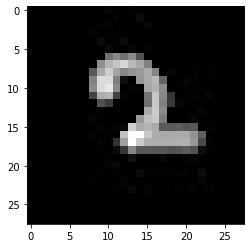

In [46]:
custom(im, w1, b1, w2, b2)